# Extract Features

1. Read csv files and load as dfs
2. Combine dfs
3. Get POS, NER
4. Save in new features_df
5. Get semantic cosine similarity

In [1]:
import os, sys

import pandas as pd

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from log_files import LogData
from data_processing import DataProcessing
from feature_extraction import SpacyFeatureExtraction

In [2]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')
subset_N = 7

In [4]:
predictions_base_path = os.path.join(base_data_path, 'prediction_logs')
predictions = True
predictions_df = log_files.read_data(notebook_dir, predictions_base_path, predictions)
predictions_df = predictions_df.loc[:subset_N, :]
predictions_df.head(3)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_1-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_1-prediction/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_2-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_2-prediction/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/pr

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.,1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,1
1,"On August 21, 2024, Bank of America speculates the revenue at Microsoft will likely increase.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,2
2,"Citigroup predicts on 2024-08-21, the operating income at Alphabet may rise.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,3


In [5]:
# observations_base_path = os.path.join(base_data_path, 'observation_logs')
# predictions = False
# observations_df = log_files.read_data(notebook_dir, observations_base_path, predictions)
# observations_df.head(3)

observations_path = os.path.join(base_data_path, 'observation_logs/batch_5-observation/batch_5-from_df.csv')
observations_df = DataProcessing.load_from_file(observations_path, 'csv')
observations_df = observations_df.iloc[:subset_N, :]
observations_df

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase observed that the net profit at Amazon had remained stable in Q2 2026.,0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,1
1,"On 08/20/2024 to 08/20/2025, Bank of America speculated the operating income at Microsoft changed.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,2
2,"Citigroup noted on 2024-08-20, the research and development expenses at Alphabet fell.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,3
3,"According to a financial analyst, the gross profit at Facebook rose in Q3 2025.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,4
4,"In 2025-08-20, a college student envisioned that the operating cash flow at Intel decreased.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,5
5,"The stock price at Google increased in August 2025, according to a research advisor.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,6
6,"JPMorgan Chase noted that the operating income at Microsoft had risen significantly on September 10, 2024.",0,finance,llama-3.3-70b-instruct,NAVI_GATOR,0,1


## Get Sentences Only

In [6]:
prediction_sentences = DataProcessing.df_to_list(predictions_df, 'Base Sentence')
observation_sentences = DataProcessing.df_to_list(observations_df, 'Base Sentence')

## Embed Sentences

In [7]:
prediction_spacy_fe = SpacyFeatureExtraction(predictions_df, 'Base Sentence')
observation_spacy_fe = SpacyFeatureExtraction(observations_df, 'Base Sentence')

prediction_embedding_df = prediction_spacy_fe.sentence_feature_extraction(attach_to_df=True)
observations_embedding_df = observation_spacy_fe.sentence_feature_extraction(attach_to_df=True)

100%|██████████| 7/7 [00:00<00:00, 286.26it/s]


In [8]:
import numpy as np
prediction_embeddings = np.array(prediction_embedding_df["Embedding"].to_list())
prediction_embeddings

array([[-3.04046601e-01,  2.26340234e-01, -4.48737442e-02, ...,
        -5.28536178e-02, -7.75294378e-02, -1.29331113e-03],
       [-1.82849824e-01,  3.16186368e-01,  5.47152683e-02, ...,
        -9.08890590e-02, -1.40255988e-01,  6.47388026e-02],
       [-1.64879456e-01,  3.97563279e-01,  5.44618219e-02, ...,
        -5.56509346e-02,  7.68545270e-02,  9.22665745e-02],
       ...,
       [-9.09398645e-02,  1.65367424e-01, -9.60092247e-02, ...,
        -4.05077450e-03, -4.32644747e-02,  1.38253003e-01],
       [-2.24677563e-01,  2.28302136e-01, -3.20941433e-02, ...,
        -4.17115443e-05, -8.83726478e-02,  6.11200277e-03],
       [-1.61749884e-01,  3.87898356e-01,  5.75582758e-02, ...,
        -1.21841565e-01, -1.31712928e-01,  6.68158233e-02]], dtype=float32)

In [9]:
observation_embeddings = np.array(observations_embedding_df["Embedding"].to_list())
observation_embeddings

array([[-0.2123913 ,  0.17799488, -0.05324987, ..., -0.02688187,
        -0.09497418,  0.0064435 ],
       [-0.13267156,  0.14998312, -0.00147168, ...,  0.03780744,
        -0.09166919,  0.07035895],
       [-0.13628061,  0.28739893,  0.01525788, ..., -0.00785855,
         0.01606433,  0.09658783],
       ...,
       [-0.17287306,  0.27120465,  0.12618509, ...,  0.01467375,
        -0.0256604 ,  0.04875375],
       [-0.16220006,  0.2078711 ,  0.0245038 , ..., -0.02128213,
        -0.07732725,  0.16077155],
       [-0.19199078,  0.18569055,  0.06755562, ..., -0.00881628,
        -0.06140083, -0.00458738]], dtype=float32)

## Cluster

### KMeans

In [10]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import numpy as np

def plot_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    tsne = TSNE(n_components=n_clusters, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
    print(tsne)

    # Get cluster labels and cluster centers
    labels = kmeans.labels_
    print(labels)
    centers = kmeans.cluster_centers_
    # print(centers)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    # Plot data points colored by cluster labels
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X')

    # Add title and axis labels
    plt.title('KMeans Clustering Scatter Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the plot
    plt.show()


In [11]:
observation_embeddings

array([[-0.2123913 ,  0.17799488, -0.05324987, ..., -0.02688187,
        -0.09497418,  0.0064435 ],
       [-0.13267156,  0.14998312, -0.00147168, ...,  0.03780744,
        -0.09166919,  0.07035895],
       [-0.13628061,  0.28739893,  0.01525788, ..., -0.00785855,
         0.01606433,  0.09658783],
       ...,
       [-0.17287306,  0.27120465,  0.12618509, ...,  0.01467375,
        -0.0256604 ,  0.04875375],
       [-0.16220006,  0.2078711 ,  0.0245038 , ..., -0.02128213,
        -0.07732725,  0.16077155],
       [-0.19199078,  0.18569055,  0.06755562, ..., -0.00881628,
        -0.06140083, -0.00458738]], dtype=float32)

In [12]:
### GET #clusers, where #clusers = #domains
domain = prediction_embedding_df["Domain"].unique()
print(domain)

domain = observations_embedding_df["Domain"].unique()
print(domain)

['finance']
['finance']


## Combine Predictions and Observations + Plot

In [13]:
# [0 1 1 1 1 1 0 1 0 1 1 1 1 1 1]

[[-0.3040466   0.22634023 -0.04487374 ... -0.05285362 -0.07752944
  -0.00129331]
 [-0.18284982  0.31618637  0.05471527 ... -0.09088906 -0.14025599
   0.0647388 ]
 [-0.16487946  0.39756328  0.05446182 ... -0.05565093  0.07685453
   0.09226657]
 ...
 [-0.17287306  0.27120465  0.12618509 ...  0.01467375 -0.0256604
   0.04875375]
 [-0.16220006  0.2078711   0.0245038  ... -0.02128213 -0.07732725
   0.16077155]
 [-0.19199078  0.18569055  0.06755562 ... -0.00881628 -0.06140083
  -0.00458738]]


/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[[  83.31342     39.69469  ]
 [  11.621891    -3.6229455]
 [ -16.177534   -85.66547  ]
 [  -5.9618683   95.52081  ]
 [ -24.31109    -11.268264 ]
 [ -11.130942    58.66663  ]
 [  94.688225    48.186348 ]
 [  -6.864836   -10.814642 ]
 [  66.984604    28.574966 ]
 [  28.284079   -11.626094 ]
 [ -25.831318   -95.58432  ]
 [ -23.700172   101.86602  ]
 [ -12.944381  -110.9563   ]
 [ -12.380653    81.705925 ]
 [  25.194221     8.821752 ]]
[0 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


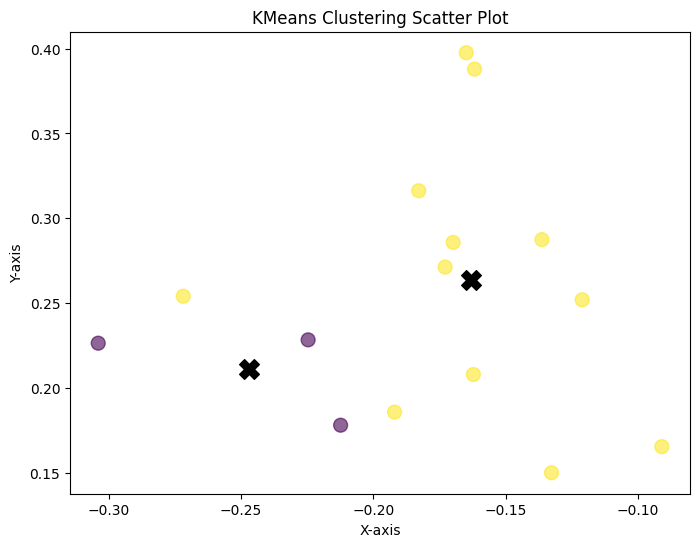

In [14]:
embeddings = np.concatenate((prediction_embeddings, observation_embeddings))
print(embeddings)
# plot_clusters(prediction_embeddings, 2)
# plot_clusters(observation_embeddings, 2)
plot_clusters(embeddings, 2)

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


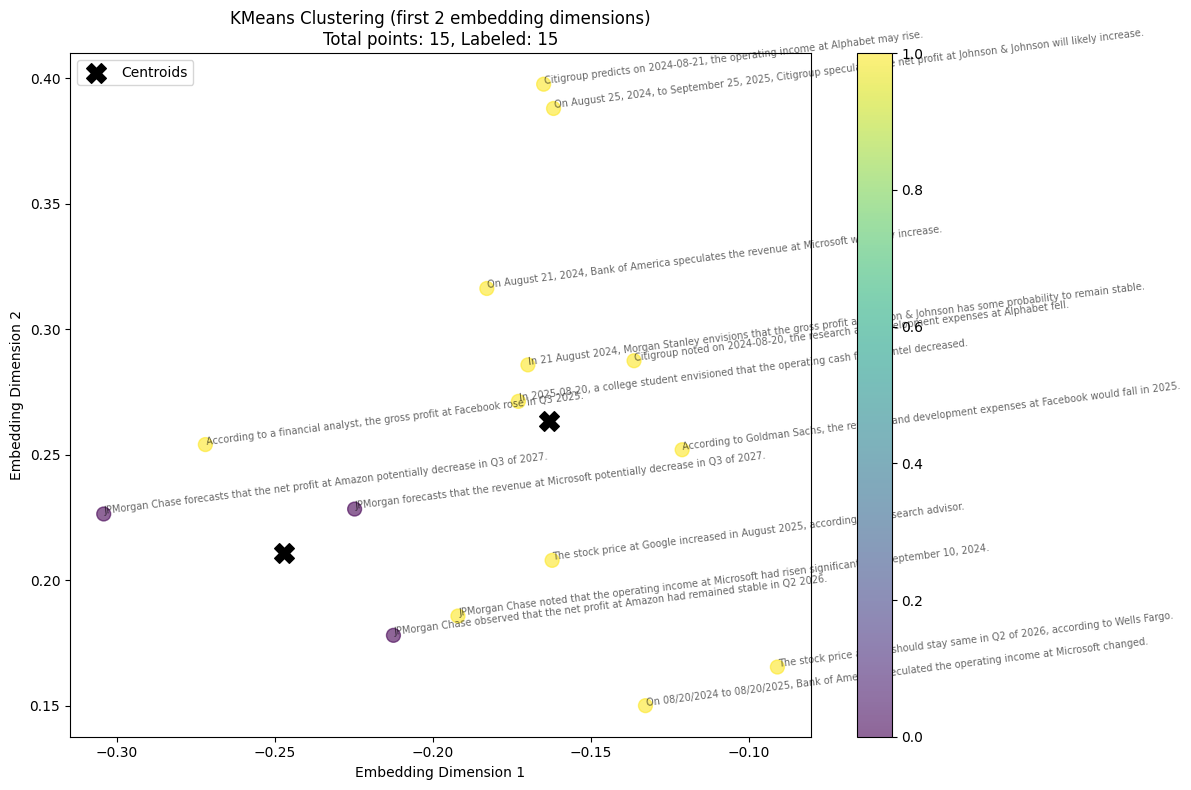

In [15]:
def plot_clusters(X, df, n_clusters, text_column='Base Sentence'):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.figure(figsize=(12, 8))
    
    # Plot data points colored by cluster labels
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    
    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')
    
    # Add text labels with shortened sentences
    for i, (x, y) in enumerate(X[:, :2]):
        if i < len(df):
            sentence = df.iloc[i][text_column]
            # shortened = sentence[:30] + "..." if len(sentence) > 30 else sentence
            plt.annotate(sentence, (x, y), fontsize=7, alpha=0.6, rotation=7)
    
    plt.title(f'KMeans Clustering (first 2 embedding dimensions)\nTotal points: {len(X)}, Labeled: {len(df)}')
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.legend()
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

# Usage - you need to concatenate both dataframes
combined_df = pd.concat([predictions_df, observations_df], ignore_index=True)
plot_clusters(embeddings, combined_df, 2)

/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_27736/2073044119.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne[:, 0], tsne[:, 1], s=100, alpha=0.6, cmap='viridis')


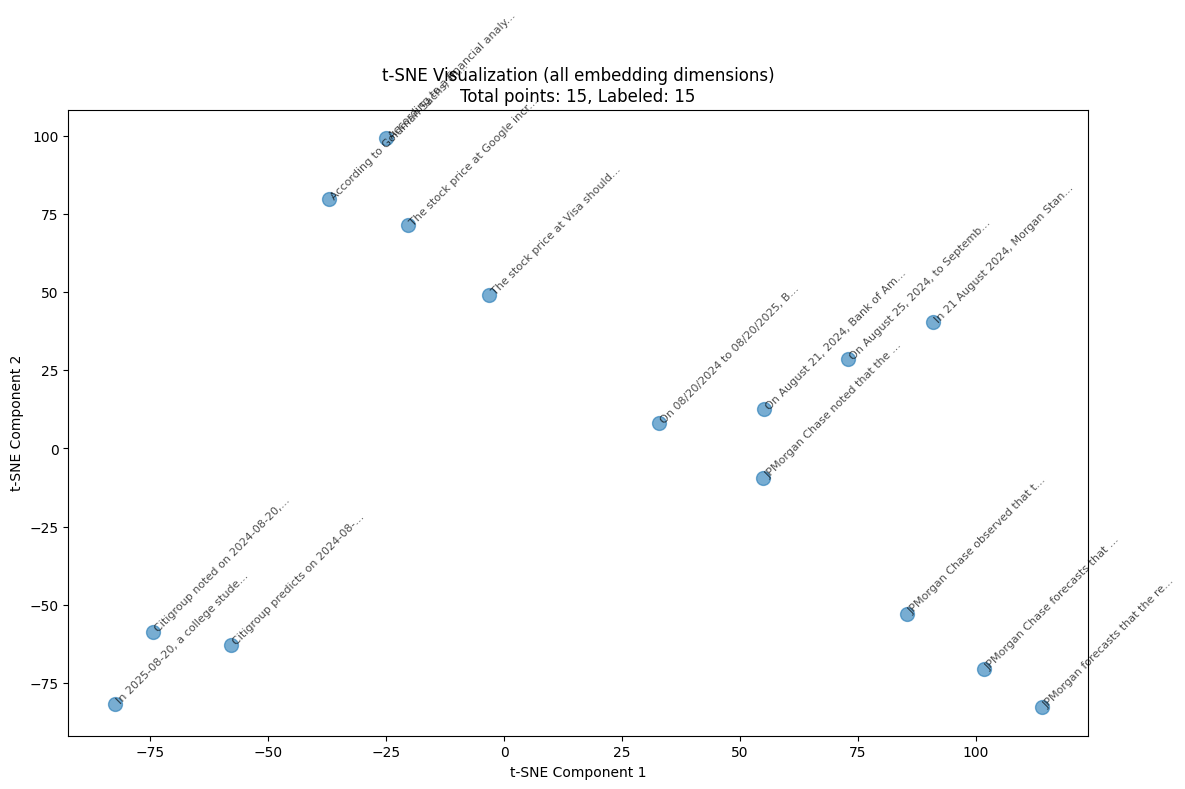

In [16]:
def plot_tsne(X, df, text_column='Base Sentence'):
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, random_state=0).fit_transform(X)
    
    plt.figure(figsize=(12, 8))
    
    # Plot data points
    scatter = plt.scatter(tsne[:, 0], tsne[:, 1], s=100, alpha=0.6, cmap='viridis')
    
    # Add text labels with shortened sentences
    for i, (x, y) in enumerate(tsne):
        if i < len(df):
            sentence = df.iloc[i][text_column]
            shortened = sentence[:30] + "..." if len(sentence) > 30 else sentence
            plt.annotate(shortened, (x, y), fontsize=8, alpha=0.7, rotation=45)
    
    plt.title(f't-SNE Visualization (all embedding dimensions)\nTotal points: {len(X)}, Labeled: {len(df)}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.tight_layout()
    plt.show()

# Usage
combined_df = pd.concat([predictions_df, observations_df], ignore_index=True)
plot_tsne(embeddings, combined_df)

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


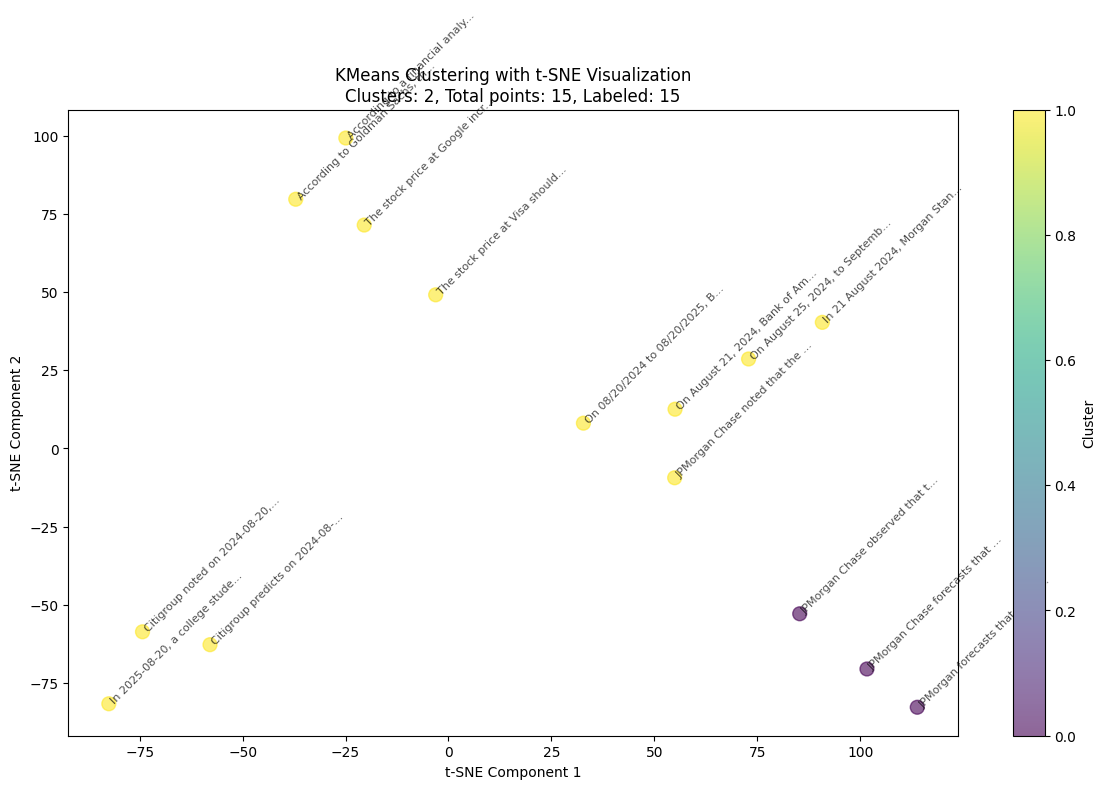

In [17]:
def plot_kmeans_tsne(X, df, n_clusters, text_column='Base Sentence'):
    # KMeans clustering on full dimensional data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_
    
    # t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, random_state=0).fit_transform(X)
    
    plt.figure(figsize=(12, 8))
    
    # Plot t-SNE reduced data colored by KMeans cluster labels
    scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    
    # Add text labels with shortened sentences
    for i, (x, y) in enumerate(tsne):
        if i < len(df):
            sentence = df.iloc[i][text_column]
            shortened = sentence[:30] + "..." if len(sentence) > 30 else sentence
            plt.annotate(shortened, (x, y), fontsize=8, alpha=0.7, rotation=45)
    
    plt.title(f'KMeans Clustering with t-SNE Visualization\nClusters: {n_clusters}, Total points: {len(X)}, Labeled: {len(df)}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()

# Usage
combined_df = pd.concat([predictions_df, observations_df], ignore_index=True)
plot_kmeans_tsne(embeddings, combined_df, 2)

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


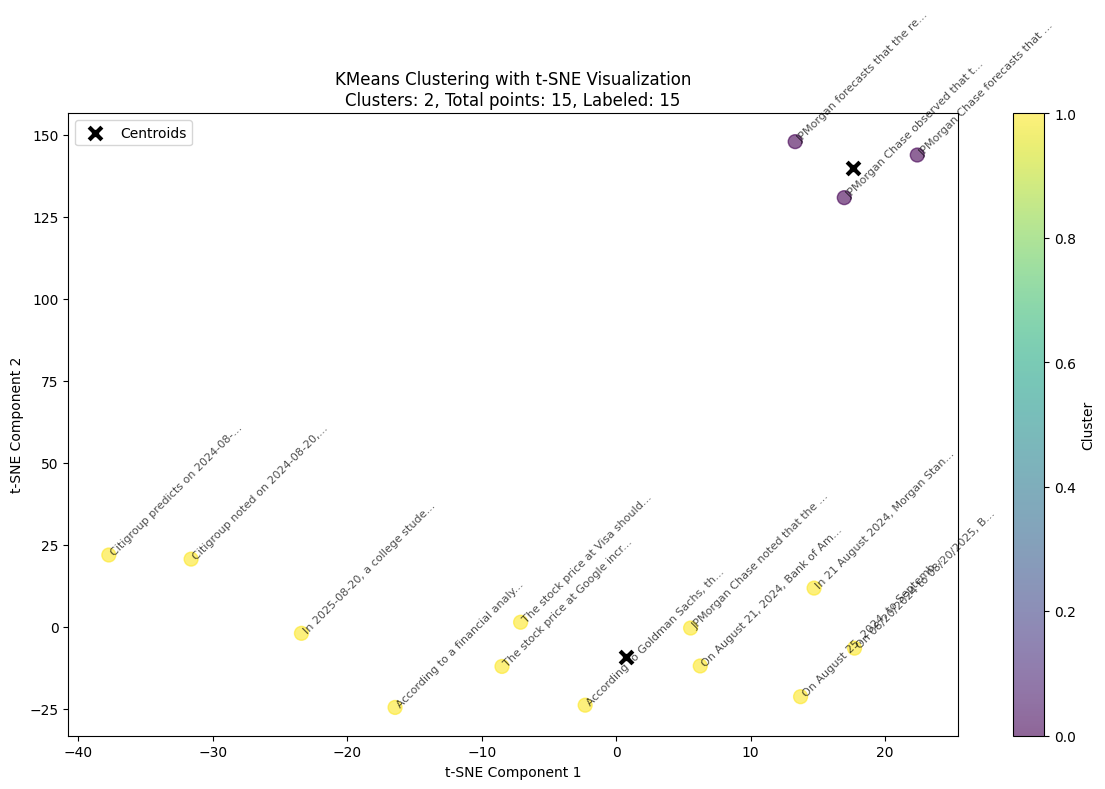

In [21]:
def plot_kmeans_tsne(X, df, n_clusters, text_column='Base Sentence'):
    # KMeans clustering on full dimensional data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # t-SNE dimensionality reduction on data + centroids
    X_with_centers = np.vstack([X, centers])
    tsne_result = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2, random_state=0).fit_transform(X_with_centers)
    
    # Split back into data points and centroids
    tsne = tsne_result[:-n_clusters]
    centers_tsne = tsne_result[-n_clusters:]
    
    plt.figure(figsize=(12, 8))
    
    # Plot t-SNE reduced data colored by KMeans cluster labels
    scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    
    # Plot centroids
    plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='black', s=200, marker='X', label='Centroids', edgecolors='white', linewidths=2)
    
    # Add text labels
    for i, (x, y) in enumerate(tsne):
        if i < len(df):
            sentence = df.iloc[i][text_column]
            shortened = sentence[:30] + "..." if len(sentence) > 30 else sentence
            plt.annotate(shortened, (x, y), fontsize=8, alpha=0.7, rotation=45)
    
    plt.title(f'KMeans Clustering with t-SNE Visualization\nClusters: {n_clusters}, Total points: {len(X)}, Labeled: {len(df)}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()

# Usage
combined_df = pd.concat([predictions_df, observations_df], ignore_index=True)
plot_kmeans_tsne(embeddings, combined_df, 2)

X shape: (15, 300)
df length: 15
Labels: [0 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


t-SNE shape: (15, 2)
t-SNE sample: [[-54.618538  -25.527672 ]
 [  1.2162477 -14.278182 ]
 [ 15.647858   75.036385 ]]
Centers: [[-53.516773 -25.290182]
 [ 14.672791 -11.256806]]


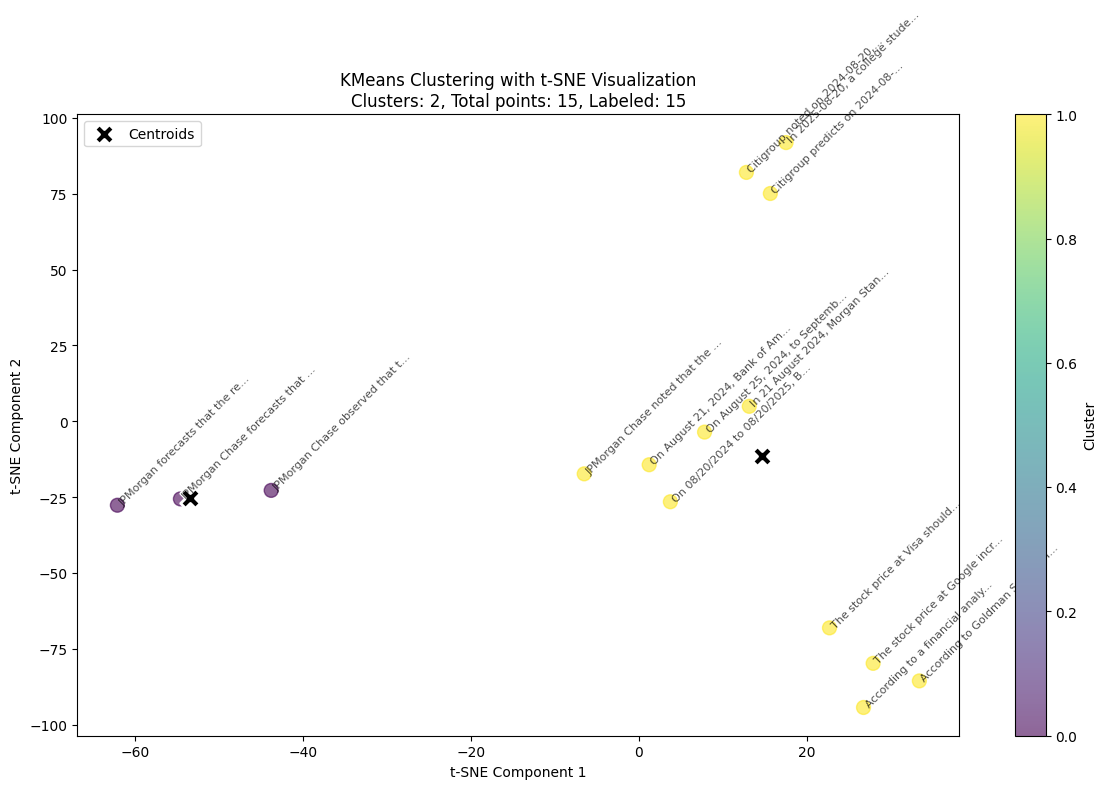

In [25]:
def plot_kmeans_tsne(X, df, n_clusters, text_column='Base Sentence'):
    print(f"X shape: {X.shape}")
    print(f"df length: {len(df)}")
    
    # KMeans clustering on full dimensional data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_
    print(f"Labels: {labels}")
    
    # t-SNE dimensionality reduction on data only
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2, random_state=0).fit_transform(X)
    print(f"t-SNE shape: {tsne.shape}")
    print(f"t-SNE sample: {tsne[:3]}")
    
    # Calculate centroid positions as mean of cluster members in t-SNE space
    centers_tsne = np.array([tsne[labels == i].mean(axis=0) for i in range(n_clusters)])
    print(f"Centers: {centers_tsne}")
    
    plt.figure(figsize=(12, 8))
    
    # Plot t-SNE reduced data colored by KMeans cluster labels
    scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    
    # Plot centroids
    plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='black', s=200, marker='X', label='Centroids', edgecolors='white', linewidths=2)
    
    # Add text labels
    for i, (x, y) in enumerate(tsne):
        if i < len(df):
            sentence = df.iloc[i][text_column]
            shortened = sentence[:30] + "..." if len(sentence) > 30 else sentence
            plt.annotate(shortened, (x, y), fontsize=8, alpha=0.7, rotation=45)
    
    plt.title(f'KMeans Clustering with t-SNE Visualization\nClusters: {n_clusters}, Total points: {len(X)}, Labeled: {len(df)}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()

plot_kmeans_tsne(embeddings, combined_df, 2)

# Source - https://stackoverflow.com/a/32370538
# Posted by Reblochon Masque, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-18, License - CC BY-SA 4.0

![title](../misc/kmeansAndTsnePlotComparisions.png)

zsh:1: number expected
